In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# 加载数据
np_XY = np.load('np_XY.npy')
np_cont = np.load('np_cont.npy')

from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.ticker as ticker

config={"font.family":'serif',
        "font.size":10,
        "mathtext.fontset":'stix',
        "font.serif":['SimSun'],
       }

rcParams.update(config)

z =np_cont[:,30]
x = np_XY[:,0]
y = np_XY[:,1]


shape=np_cont.shape

Z_min=np.zeros(shape[1])
Z_max=np.zeros(shape[1])

for i in range(shape[1]):
    Z_min[i]=np_cont[:,i].min()
    Z_max[i]=np_cont[:,i].max()


print(" max and min", (Z_min.min(), Z_max.max()))
Xsort_indices = np.lexsort((y, x))  # 部门 → 年龄 → 分数降序

Xsorted_x = x[Xsort_indices]
Xsorted_y = y[Xsort_indices]
Xsorted_z = z[Xsort_indices]

Xsection_x1=Xsorted_x[Xsorted_x == 1]
Xsection_y1=Xsorted_y[Xsorted_x == 1]
Xsection_z1=Xsorted_z[Xsorted_x == 1]

Xsection_x0=Xsorted_x[Xsorted_x == 0]
Xsection_y0=Xsorted_y[Xsorted_x == 0]
Xsection_z0=Xsorted_z[Xsorted_x == 0]

Ysort_indices = np.lexsort((x,y))  # 部门 → 年龄 → 分数降序

Ysorted_x = x[Ysort_indices]
Ysorted_y = y[Ysort_indices]
Ysorted_z = z[Ysort_indices]

Ysection_x1=Ysorted_x[Ysorted_y == 1]
Ysection_y1=Ysorted_y[Ysorted_y == 1]
Ysection_z1=Ysorted_z[Ysorted_y == 1]

Ysection_x0=Ysorted_x[Ysorted_y == 0]
Ysection_y0=Ysorted_y[Ysorted_y == 0]
Ysection_z0=Ysorted_z[Ysorted_y == 0]



 max and min (-0.2, 0.2)


In [30]:
def scientific_notationy(x, pos):
    # 处理零的情况
    if x == 0:
        return r'$0$'  # 对于零，显示为 0
    else:
        # 计算指数部分
        exponent = np.floor(np.log10(abs(x)))
        mantissa = x / (10**exponent)
        
        # LaTeX格式化字符串，将指数部分放在上方
        if x < 0:
            return r'${0:.2f} \cdot 10^{{{1}}}$'.format(mantissa, int(exponent))
        else:
            return r'${0:.2f} \cdot 10^{{{1}}}$'.format(mantissa, int(exponent))
        
def scientific_notationx(x, pos):
    # 使用 LaTeX 数学格式将刻度标签转化为小数形式
    return r"${0:.2f}$".format(x)

def scientific_notationxx(x, pos):
    # 使用 LaTeX 数学格式将刻度标签转化为小数形式
    return r"${0:.1f}$".format(x)


findfont: Generic family 'serif' not found because none of the following families were found: SimSun
/tmp/ipykernel_201895/2086646138.py:31: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
findfont: Generic family 'serif' not found because none of the following families were found: SimSun
findfont: Generic family 'serif' not found because none of the following families were found: SimSun


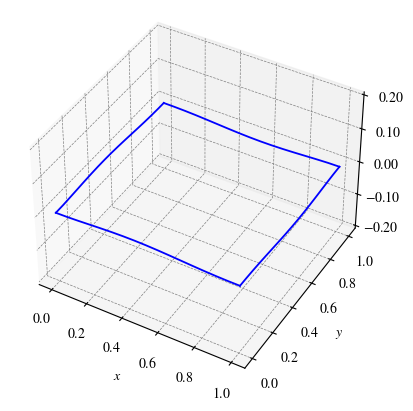

In [31]:
ax = plt.axes(projection='3d')
ax.plot3D(Xsection_x0, Xsection_y0, Xsection_z0, 'b',linewidth=1.3)
ax.plot3D(Xsection_x1, Xsection_y1, Xsection_z1, 'b',linewidth=1.3)
ax.plot3D(Ysection_x0, Ysection_y0, Ysection_z0, 'b',linewidth=1.3)
ax.plot3D(Ysection_x1, Ysection_y1, Ysection_z1, 'b',linewidth=1.3)
ax.view_init(elev=45)
ax.xaxis._axinfo["grid"].update({"linestyle": '--', "linewidth": 0.5, "color": "gray"})
ax.yaxis._axinfo["grid"].update({"linestyle": '--', "linewidth": 0.5, "color": "gray"})
ax.zaxis._axinfo["grid"].update({"linestyle": '--', "linewidth": 0.5, "color": "gray"})

plt.xticks([0, 0.2, 0.4,0.6,0.8,1])
plt.yticks([0, 0.2, 0.4,0.6,0.8,1])

yticks = ax.get_yticks()

xticks = ax.get_xticks()

#ax.set_zticks([0, 0.1, 0.2, 0.3])
ax.set_zticks([-0.2, -0.1, 0, 0.1,0.2])
zticks=ax.get_zticks()

ax.set_yticks(yticks)  # 重新设置 y 轴刻度位置
ax.set_yticklabels([scientific_notationxx(tick, None) for tick in yticks])  # 使用自定义格式设置刻度标签

ax.set_xticks(xticks)
ax.set_xticklabels([scientific_notationxx(tick, None) for tick in xticks])  # 使用自定义格式设置刻度标签

ax.set_zticks(zticks)
ax.set_zticklabels([scientific_notationx(tick, None) for tick in zticks])
ax.view_init(elev=40)
plt.tight_layout()
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.savefig('control.pdf')
plt.show()


In [32]:
T_end=1
DeltaT=1/2**2
T_time=np.arange(0,T_end+DeltaT,DeltaT)
LenT=len(T_time)
print(T_time)
print(LenT)

[0.   0.25 0.5  0.75 1.  ]
5


In [55]:
DeltaTRef=1/2**3
T_timeRef=np.arange(0,T_end+DeltaTRef,DeltaTRef)
LenTRef=len(T_timeRef)
print(T_timeRef)
print(LenTRef)

[0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.   ]
9


In [128]:
print(T_timeRef[1*2])

0.25


In [129]:
dis_time=int(DeltaT/DeltaTRef)

In [130]:
for i in range(LenT):
    if i>0:
       for j in range((i-1)*dis_time+1, i*dis_time+1):
            print(T_time[i])

0.25
0.25
0.5
0.5
0.75
0.75
1.0
1.0


In [122]:
print(range((i-1)*dis_time+1, (i-1)*dis_time+1))

range(25, 25)
